0. Narysować wybrane obrazy.
1. Wykorzystać algorytm PCA do kompresji zbioru Olivetti Faces. Dobrać odpowiednią liczbę składowych. Po transformacji obliczyć [stopień kompresji](https://pl.wikipedia.org/wiki/Stopie%C5%84_kompresji). Rozmiar obrazka: liczba wartości numerycznych
2. Przeprowadzić transformację odwrotną (inverse_transform). Narysować, porównać z pkt. 0. Obliczyć błąd rekonstrukcji w postaci błędu RMSE dla każdego obrazu.
3. Przygotować kilka / kilkanaście zmodyfikowanych obrazów (np. obróconych o 90 stopni, przyciemnionych, odbitych w poziomie).
4. Korzystając z modelu wyuczonego w pkt. 1 przeprowadzić transformację, a następnie odwrotną transformację obrazów z pkt. 3. Obliczyć błąd rekonstrukji dla każdego typu modyfikacji. Porównać z wartościami błędu uzyskanymi w pkt. 2.
5. Czy PCA może służyć do wykrywania pewnego typu anomalii w zdjęciach twarzy? Jeżeli tak to jakich?

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(4)

In [2]:
df = fetch_olivetti_faces() 
print(df.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [3]:
img = df.images

In [4]:
df = df.data

In [5]:
df.shape

(400, 4096)

In [6]:
image_shape = (64, 64)
def plot_gallery(images, n_col=4, n_row=2, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = 1
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [7]:
idx = np.random.randint(400, size=8)

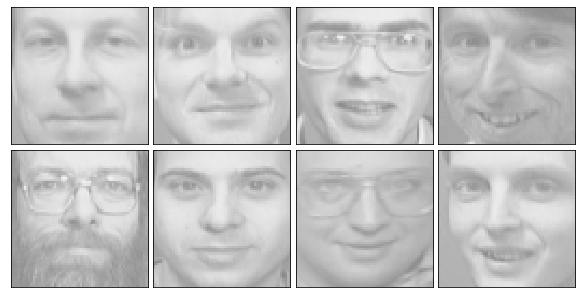

In [8]:
plot_gallery(df[idx,:])

1. Wykorzystać algorytm PCA do kompresji zbioru Olivetti Faces. Dobrać odpowiednią liczbę składowych. Po transformacji obliczyć [stopień kompresji](https://pl.wikipedia.org/wiki/Stopie%C5%84_kompresji). Rozmiar obrazka: liczba wartości numerycznych


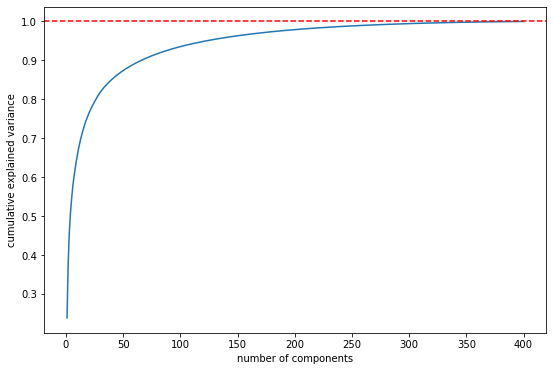

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(df)

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=1, color='r', linestyle='--')

Wybieram 100 komponentów

In [10]:
pca = PCA(n_components=100)
pca.fit(df)
rd =pca.transform(df)
sum(pca.explained_variance_ratio_)

0.9349335432052612

In [11]:
rd.shape

(400, 100)

In [12]:
df.shape

(400, 4096)

In [13]:
df.shape[1]/rd.shape[1]

40.96

2. Przeprowadzić transformację odwrotną (inverse_transform). Narysować, porównać z pkt. 0. Obliczyć błąd rekonstrukcji w postaci błędu RMSE dla każdego obrazu.


In [14]:
approx = pca.inverse_transform(rd)

In [15]:
approx.shape

(400, 4096)

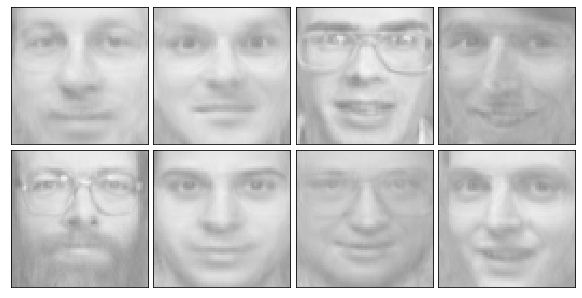

In [16]:
plot_gallery(approx[idx,:])

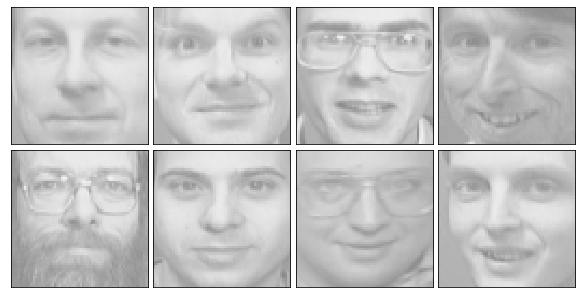

In [17]:
plot_gallery(df[idx,:])

In [18]:
((df[idx,:]-approx[idx,:])**2).sum(axis=1)

array([4.382807 , 4.299375 , 5.7705474, 4.606537 , 4.883685 , 4.5795817,
       4.648774 , 3.8401816], dtype=float32)

3. Przygotować kilka / kilkanaście zmodyfikowanych obrazów (np. obróconych o 90 stopni, przyciemnionych, odbitych w poziomie).

In [19]:
tr= np.ndarray(shape=(8,64*64))

In [20]:
tr[0:2,:] = np.round(df[idx[:2],:])

In [21]:
tr[2:4,:] = df[idx[2:4],:] * 0.3

In [22]:
tr[4:6,:] = np.flip(df[idx[4:6],:], 1)

In [23]:
tr[6:8,:] = 1 -df[idx[6:],:]

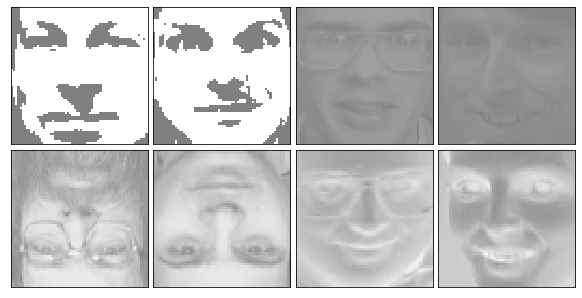

In [24]:
plot_gallery(tr)


4. Korzystając z modelu wyuczonego w pkt. 1 przeprowadzić transformację, a następnie odwrotną transformację obrazów z pkt 3. Obliczyć błąd rekonstrukji dla każdego typu modyfikacji. Porównać z wartościami błędu uzyskanymi w pkt. 2.

In [25]:
tr_appr=pca.transform(tr)

In [27]:
tr_rest = pca.inverse_transform(tr_appr)

In [28]:
((tr-tr_rest)**2).sum(axis=1)

array([246.99174895, 201.96409125,   4.20418685,   4.20770228,
        32.56407457,  38.08244674,  12.68892966,  14.34391346])

In [29]:
((df[idx,:]-approx[idx,:])**2).sum(axis=1)

array([4.382807 , 4.299375 , 5.7705474, 4.606537 , 4.883685 , 4.5795817,
       4.648774 , 3.8401816], dtype=float32)

Błędy są więkrze dla zmodyfikowanych obrazków, zwłaszcza dla zredukowanej palety odcieni, chociaż dla ciemniejszych obrazów poradził sobie lepiej.


5. Czy PCA może służyć do wykrywania pewnego typu anomalii w zdjęciach twarzy? Jeżeli tak to jakich?

Tak. Jak wynikało z powyższego eksperymentu, PCA wytrenowany na właściwych twarzach, będzie miał większe błędy przy niektórych anomaliach np. zmianie kształtu, "koloru", ale nie przyciemnieniu/rozjaśnieniu.